# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    city = f'{city}, {country}' 
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create DataFrame
# Citipy Cities
cities_weather = pd.DataFrame({
    'City': cities}, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

# Create other datafram columnns
#cities_weather["Lat"] = 0
#cities_weather["Lng"] = 0
#cities_weather["Max Temp"] = 0
#cities_weather["Humidity"] = 0
#cities_weather["Cloudiness"] = 0
#cities_weather["Wind Speed"] = 0
#cities_weather["Country"] = ""
#cities_weather["Date"] = ""

# Keep track of record and set counter information
currentSet = 0
currentRecord = 0
currentCity = "aCity"

#Loop through city list
for index, row in cities_weather.iterrows():
    try:
        currentCity = cities_weather.loc[index,"City"]
        query_url = f'{url}appid={weather_api_key}&q={currentCity}&units={units}'
        response = requests.get(query_url).json()

        cities_weather.loc[index, "Lat"] = response["coord"]["lat"]
        cities_weather.loc[index, "Lng"] = response["coord"]["lon"]
        cities_weather.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_weather.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_weather.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_weather.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_weather.loc[index, "Country"] = response["sys"]["country"]
        cities_weather.loc[index, "Date"] = response["dt"]
        print(f"Processing Record {currentRecord} of Set {currentSet} | {currentCity}")
        #print(query_url)
        
        #temp = response["main"]["temp_max"]
        #lat = response["coord"]["lat"]
        #lon = response["coord"]["lon"]
        #print(temp)
        #print(lat)
        #print(lon)
    except:
        print("City not found. Skipping...")
            
    if currentRecord < 50:
        currentRecord += 1
    else:
        currentSet += 1
        currentRecord = 0

#cities_weather

Processing Record 0 of Set 0 | kruisfontein, za
City not found. Skipping...
Processing Record 2 of Set 0 | slave lake, ca
Processing Record 3 of Set 0 | puerto ayora, ec
Processing Record 4 of Set 0 | provideniya, ru
Processing Record 5 of Set 0 | saskylakh, ru
Processing Record 6 of Set 0 | jamestown, sh
Processing Record 7 of Set 0 | ribeira grande, pt
Processing Record 8 of Set 0 | caucaia, br
Processing Record 9 of Set 0 | rikitea, pf
Processing Record 10 of Set 0 | muisne, ec
Processing Record 11 of Set 0 | deer lake, ca
Processing Record 12 of Set 0 | cape town, za
Processing Record 13 of Set 0 | coihaique, cl
Processing Record 14 of Set 0 | tete, mz
Processing Record 15 of Set 0 | port alfred, za
Processing Record 16 of Set 0 | hithadhoo, mv
Processing Record 17 of Set 0 | namibe, ao
Processing Record 18 of Set 0 | nikolskoye, ru
Processing Record 19 of Set 0 | capim grosso, br
Processing Record 20 of Set 0 | bama, ng
Processing Record 21 of Set 0 | ventspils, lv
Processing Reco

Processing Record 38 of Set 3 | masuguru, tz
Processing Record 39 of Set 3 | kaeo, nz
Processing Record 40 of Set 3 | senanga, zm
Processing Record 41 of Set 3 | karratha, au
Processing Record 42 of Set 3 | kyra, ru
Processing Record 43 of Set 3 | sao filipe, cv
City not found. Skipping...
Processing Record 45 of Set 3 | huamuxtitlan, mx
Processing Record 46 of Set 3 | mutis, co
Processing Record 47 of Set 3 | talnakh, ru
Processing Record 48 of Set 3 | la grande, us
Processing Record 49 of Set 3 | pangnirtung, ca
Processing Record 50 of Set 3 | tulum, mx
Processing Record 0 of Set 4 | teya, ru
Processing Record 1 of Set 4 | qiongshan, cn
Processing Record 2 of Set 4 | mackenzie, ca
Processing Record 3 of Set 4 | gushikawa, jp
Processing Record 4 of Set 4 | natal, br
Processing Record 5 of Set 4 | mar del plata, ar
Processing Record 6 of Set 4 | grand gaube, mu
Processing Record 7 of Set 4 | ponta delgada, pt
Processing Record 8 of Set 4 | nantucket, us
Processing Record 9 of Set 4 | c

Processing Record 23 of Set 7 | zhifang, cn
Processing Record 24 of Set 7 | chokurdakh, ru
Processing Record 25 of Set 7 | yatou, cn
Processing Record 26 of Set 7 | waitara, nz
Processing Record 27 of Set 7 | keti bandar, pk
City not found. Skipping...
Processing Record 29 of Set 7 | naliya, in
Processing Record 30 of Set 7 | kirakira, sb
Processing Record 31 of Set 7 | olinda, br
Processing Record 32 of Set 7 | batemans bay, au
Processing Record 33 of Set 7 | puerto montt, cl
Processing Record 34 of Set 7 | black river, jm
City not found. Skipping...
Processing Record 36 of Set 7 | tahe, cn
Processing Record 37 of Set 7 | ocos, gt
Processing Record 38 of Set 7 | carcassonne, fr
Processing Record 39 of Set 7 | college, us
Processing Record 40 of Set 7 | temiscaming, ca
Processing Record 41 of Set 7 | artesia, us
City not found. Skipping...
Processing Record 43 of Set 7 | qasigiannguit, gl
Processing Record 44 of Set 7 | bosaso, so
Processing Record 45 of Set 7 | smithers, ca
Processing

Processing Record 8 of Set 11 | kalininsk, ru
Processing Record 9 of Set 11 | spirit river, ca
Processing Record 10 of Set 11 | amalapuram, in
Processing Record 11 of Set 11 | cedar mill, us
Processing Record 12 of Set 11 | telimele, gn
Processing Record 13 of Set 11 | burnie, au
Processing Record 14 of Set 11 | cumana, ve
Processing Record 15 of Set 11 | alice town, bs
City not found. Skipping...
Processing Record 17 of Set 11 | pingliang, cn
Processing Record 18 of Set 11 | zhoucheng, cn
Processing Record 19 of Set 11 | xining, cn
Processing Record 20 of Set 11 | anadyr, ru
Processing Record 21 of Set 11 | ruteng, id
Processing Record 22 of Set 11 | hurricane, us
City not found. Skipping...
Processing Record 24 of Set 11 | coreau, br
Processing Record 25 of Set 11 | mehamn, no
Processing Record 26 of Set 11 | lavrentiya, ru
Processing Record 27 of Set 11 | puta, az
City not found. Skipping...
Processing Record 29 of Set 11 | uddevalla, se
Processing Record 30 of Set 11 | richards bay

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Save Data to csv
cities_weather.to_csv("Resources/Sample_Weather_Data.csv", encoding="utf-8", index=False)
# Display DataFrame
cities_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,"kruisfontein, za",-34.0033,24.7314,59,77,42,3,ZA,1612214421
1,"mataura, pf",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"slave lake, ca",55.2834,-114.769,14,92,90,11.5,CA,1612214422
3,"puerto ayora, ec",-0.7393,-90.3518,84.2,65,0,12.66,EC,1612214422
4,"provideniya, ru",64.3833,-173.3,7.45,91,100,28.99,RU,1612214422
...,...,...,...,...,...,...,...,...,...
628,"mahanoro, mg",-19.9,48.8,78.98,83,9,1.77,MG,1612214561
629,"wolfville, ca",45.0835,-64.3655,28.99,74,82,5.75,CA,1612214561
630,"baoying, cn",33.2292,119.309,34.03,85,0,9.01,CN,1612214562
631,"le mans, fr",48,0.2,50,93,90,4.61,FR,1612214562


In [6]:
summary_df = cities_weather[['Lat','Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]
summary_df2 = summary_df.dropna(how='all')
summary_df2

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-34.0033,24.7314,59,77,42,3,1612214421
2,55.2834,-114.769,14,92,90,11.5,1612214422
3,-0.7393,-90.3518,84.2,65,0,12.66,1612214422
4,64.3833,-173.3,7.45,91,100,28.99,1612214422
5,71.9167,114.083,-30.32,84,100,7.76,1612214422
...,...,...,...,...,...,...,...
628,-19.9,48.8,78.98,83,9,1.77,1612214561
629,45.0835,-64.3655,28.99,74,82,5.75,1612214561
630,33.2292,119.309,34.03,85,0,9.01,1612214562
631,48,0.2,50,93,90,4.61,1612214562


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_test = cities_weather.loc[cities_weather["Humidity"] > 100]
humidity_test
#Tested and skipped

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
# Skipped

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Skipped

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

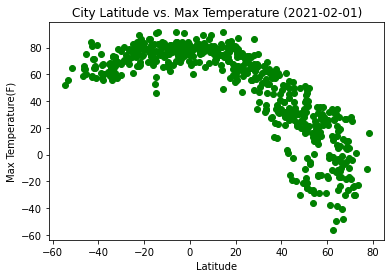

In [39]:
clean_city_data = summary_df2

x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]
currentDate = pd.Timestamp.today()
currentDate = currentDate.date()

# Plot
plt.scatter(x_values,y_values, color='green')
plt.title(f'City Latitude vs. Max Temperature ({currentDate})')
plt.ylabel('Max Temperature(F)')
plt.xlabel('Latitude')

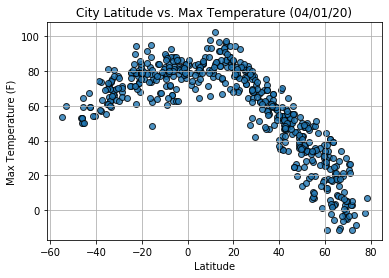

In [10]:
#Preserving Ouput

## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

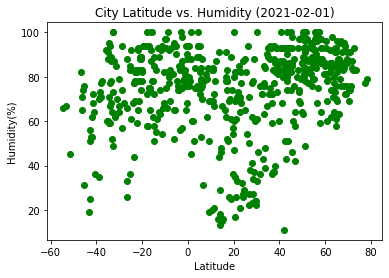

In [40]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]
currentDate = pd.Timestamp.today()
currentDate = currentDate.date()

# Plot
plt.scatter(x_values,y_values,color='green')
plt.title(f'City Latitude vs. Humidity ({currentDate})')
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')

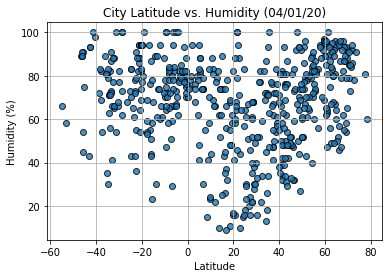

In [11]:
#Preserving Output

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

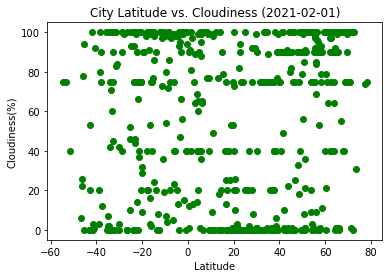

In [43]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]
currentDate = pd.Timestamp.today()
currentDate = currentDate.date()

# Plot
plt.scatter(x_values,y_values, color='green')
plt.title(f'City Latitude vs. Cloudiness ({currentDate})')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')

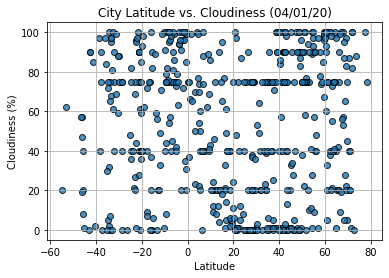

In [12]:
#Preserving Output

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

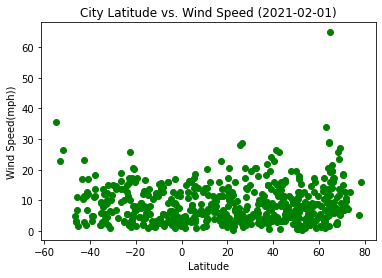

In [44]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]
currentDate = pd.Timestamp.today()
currentDate = currentDate.date()

# Plot
plt.scatter(x_values,y_values, color='green')
plt.title(f'City Latitude vs. Wind Speed ({currentDate})')
plt.ylabel('Wind Speed(mph))')
plt.xlabel('Latitude')

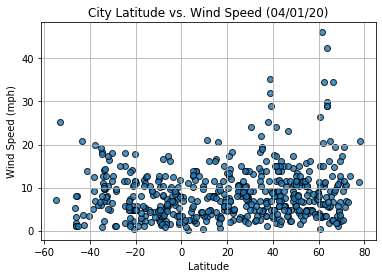

In [13]:
#Preserving Output

## Linear Regression

In [12]:
northern_hemi_df = clean_city_data.loc[clean_city_data["Lat"] > 0]

southern_hemi_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.853286089658897


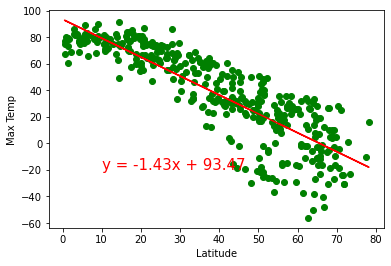

In [13]:
x_values = northern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = northern_hemi_df["Max Temp"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color = 'green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.46937863826630627


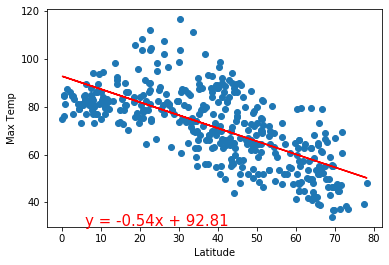

In [25]:
#Preserving Output

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5415225413453797


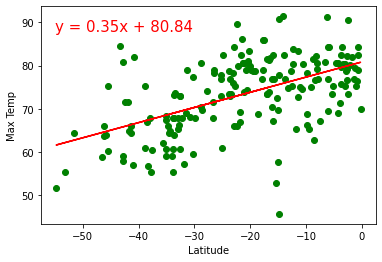

In [16]:
x_values = southern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = southern_hemi_df["Max Temp"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(-55,88),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.6082708688906918


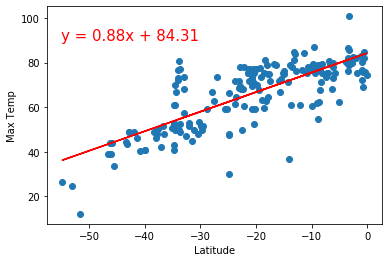

In [26]:
#Preserving Output

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.36510486543530674


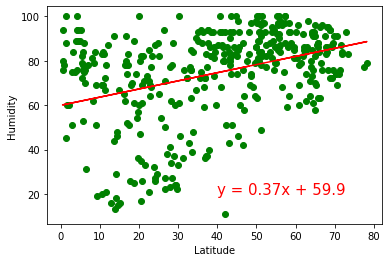

In [17]:
x_values = northern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = northern_hemi_df["Humidity"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.000543987878808455


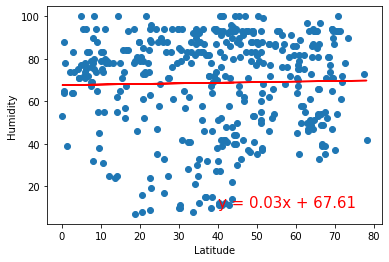

In [27]:
#Preserving Output

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3606576235499965


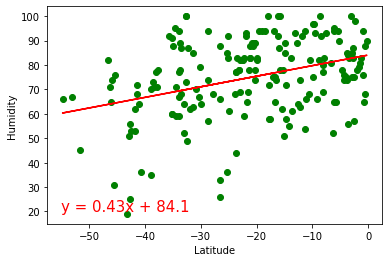

In [18]:
x_values = southern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = southern_hemi_df["Humidity"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.014985174297345524


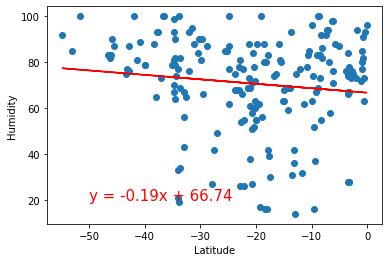

In [28]:
#Preserving Output

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2982157681834937


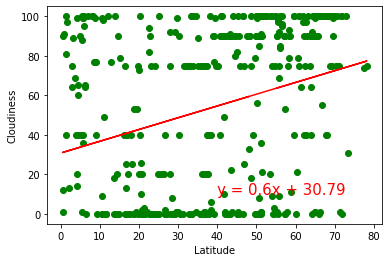

In [19]:
x_values = northern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = northern_hemi_df["Cloudiness"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.0020898727664228514


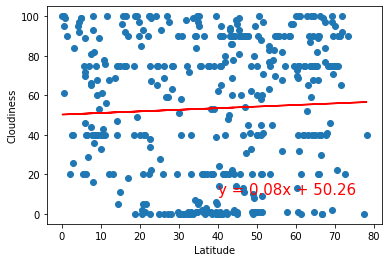

In [29]:
#Preserving Output

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2708335317018791


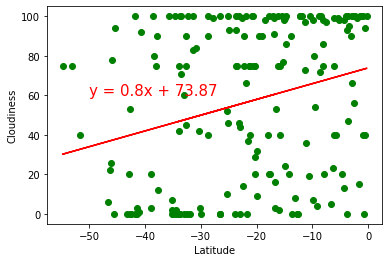

In [20]:
x_values = southern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = southern_hemi_df["Cloudiness"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.0035263772085582894


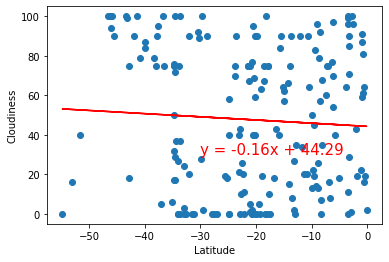

In [30]:
#Preserving Output

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1149677708785618


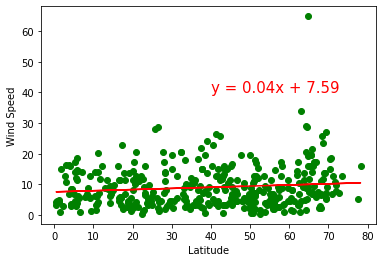

In [22]:
x_values = northern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = northern_hemi_df["Wind Speed"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.04019723576144484


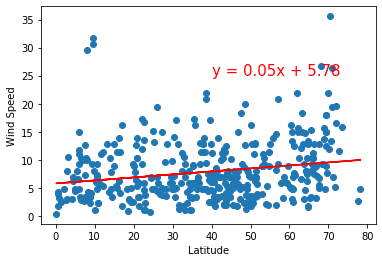

In [31]:
#Preserving Output

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.24834844621035643


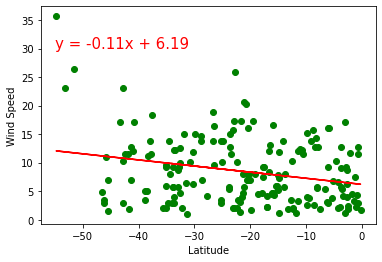

In [24]:
x_values = southern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = southern_hemi_df["Wind Speed"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.017128274759839232


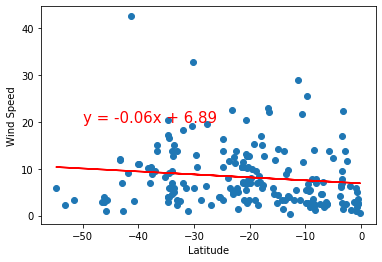

In [32]:
#Preserving Output